##### Here I am making a map on travel times to Forum shopping center. 

I am plotting a map about travel times to Forum shopping center by public transport during rush hour. In addition to travel times, the map will also feature roads and the metroline, which is a crucial part of the public transport network. 

In [25]:
# Import essential modules
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt

# Filepaths
grid_fp = r'data/MetropAccess_YKR_grid_EurefFIN.shp'
roads_fp = "data/roads.shp"
metro_fp = "data/metro.shp"

# Reading files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [48]:
# Creating Forum shapefile

# Reading travel time data about Forum
forum_fp = r'data/TravelTimes_to_5975373_Forum.txt'

data_forum = pd.read_csv(forum_fp, sep=';')


# Merging data
forum_geo = grid.merge(data_forum, left_on='YKR_ID', right_on='from_id')

# Removing no-data values
import numpy as np
forum_geo = forum_geo.replace(-1, np.nan)
forum_geo.dropna(inplace=True)

# Shapefile
forum_geo.to_file('data/Forum_TT.shp')

In [27]:
# Checking the crs of layers
print(grid.crs)
print(roads.crs)
print(metro.crs)
print(forum_geo.crs)

epsg:3067
epsg:2392
epsg:2392
epsg:3067


In [29]:
# Reprojecting geometries to match
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)

In [30]:
roads.crs == grid.crs == metro.crs == forum_geo.crs

True

Next up, plotting the map.

Text(360000, 6664000, 'Travel time data by Digital Geography Lab')

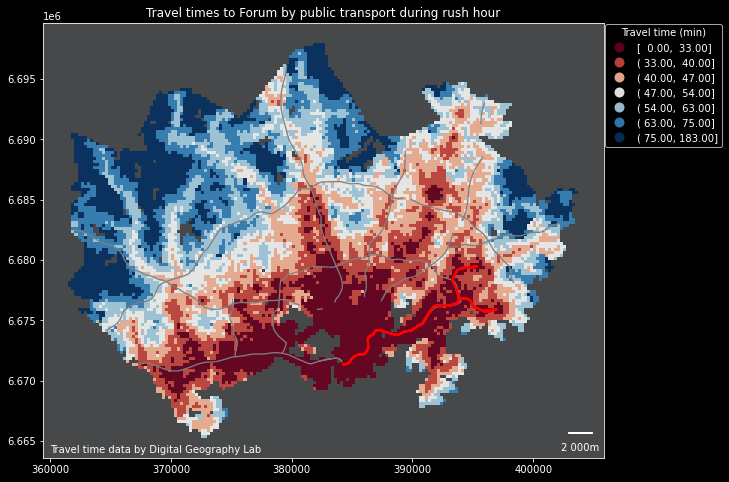

In [92]:
# Visualizing the travel times
fig, ax = plt.subplots(figsize=(12,8))

forum_geo.plot(ax=ax, column="pt_r_t", 
               linewidth=0.03, 
               cmap="RdBu", 
               scheme="quantiles", 
               k=7, 
               alpha=0.9, 
               legend=True)

ax.set_facecolor("#46484a")

# Setting title
ax.set_title('Travel times to Forum by public transport during rush hour')

# Adding scale bar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

scalebar = AnchoredSizeBar(ax.transData,
                           2000, 
                           '2 000m', 
                           'lower right',
                           borderpad=0.4,
                           sep=10,
                           frameon=False,
                           size_vertical=100,
                           color='white'
                           )

ax.add_artist(scalebar)

# Re-position the legend and set a title
ax.get_legend().set_bbox_to_anchor((1.22,1.01))
ax.get_legend().set_title("Travel time (min)")

# Adding roads
roads.plot(ax=ax, color="grey", linewidth=1.3)

# Add metro on top
metro.plot(ax=ax, color="r", linewidth=2)

# Credits
credits = "Travel time data by Digital Geography Lab"
ax.text(y=6664000, x=360000, s=credits)
